In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


# 实战：训练图像分类器

我们将上一节的内容投入实战，训练一个图像分类器来对 CIFAR10 数据集中的图像进行分类。


## 1. 加载和标准化 CIFAR-10

CIFAR-10 是一个常用的数据集，包含 10 个类别的 60000 张 32x32 的彩色图像。训练集中每个类别有 5000 张图像，测试集中每个类别有 1000 张图像。

![CIFAR-10 数据集中的图像示例](https://pytorch.org/tutorials/_images/cifar10.png)

我们将使用 torchvision 来加载 CIFAR-10 数据集。

我们还需要对数据进行归一化、标准化。归一化即将数据映射到 $[0,1]$ 区间，标准化即将数据映射到均值为 0，标准差为 1 的分布中（减去均值，再除以标准差）。


In [2]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
	[transforms.ToTensor(),
	 transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))]) # 归一化

batch_size = 4 # 批处理大小

trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
                                        download=True, transform=transform) # 下载训练数据集
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2) # 加载训练数据集

testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform) # 下载测试数据集
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2) # 加载测试数据集

classes = (
	"apple",
	"aquarium_fish",
	"baby",
	"bear",
	"beaver",
	"bed",
	"bee",
	"beetle",
	"bicycle",
	"bottle",
	"bowl",
	"boy",
	"bridge",
	"bus",
	"butterfly",
	"camel",
	"can",
	"castle",
	"caterpillar",
	"cattle",
	"chair",
	"chimpanzee",
	"clock",
	"cloud",
	"cockroach",
	"couch",
	"cra",
	"crocodile",
	"cup",
	"dinosaur",
	"dolphin",
	"elephant",
	"flatfish",
	"forest",
	"fox",
	"girl",
	"hamster",
	"house",
	"kangaroo",
	"keyboard",
	"lamp",
	"lawn_mower",
	"leopard",
	"lion",
	"lizard",
	"lobster",
	"man",
	"maple_tree",
	"motorcycle",
	"mountain",
	"mouse",
	"mushroom",
	"oak_tree",
	"orange",
	"orchid",
	"otter",
	"palm_tree",
	"pear",
	"pickup_truck",
	"pine_tree",
	"plain",
	"plate",
	"poppy",
	"porcupine",
	"possum",
	"rabbit",
	"raccoon",
	"ray",
	"road",
	"rocket",
	"rose",
	"sea",
	"seal",
	"shark",
	"shrew",
	"skunk",
	"skyscraper",
	"snail",
	"snake",
	"spider",
	"squirrel",
	"streetcar",
	"sunflower",
	"sweet_pepper",
	"table",
	"tank",
	"telephone",
	"television",
	"tiger",
	"tractor",
	"train",
	"trout",
	"tulip",
	"turtle",
	"wardrobe",
	"whale",
	"willow_tree",
	"wolf",
	"woman",
	"worm",
) # 类别


Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 2. 定义卷积神经网络

这一次，我们需要将上一节的神经网络改为接受 RGB 三个通道的图像，而不是单通道的图像。


In [4]:
import torch.nn as nn
import torch.nn.functional as F


model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)

model.fc.out_features = 100

model.eval()

Using cache found in C:\Users\BobYu/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\BobYu\miniconda3\envs\PyTorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\BobYu\miniconda3\envs\PyTorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 3. 定义损失函数和优化器


In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 4. 训练网络


In [6]:
def test():
	correct = 0
	total = 0
	# 因为我们不需要进行梯度计算，所以我们使用 torch.no_grad() 来减少内存开销
	with torch.no_grad():
		for data in testloader:
			inputs, labels = data
			inputs, labels = inputs.to(device), labels.to(device)
			outputs = model(inputs)
			_, predicted = torch.max(outputs.data, 1) # 取得分最高的那个类 (outputs.data 的索引号)
			total += labels.size(0) # 统计测试数据集的数量
			correct += (predicted == labels).sum().item() # 统计预测正确的数量
	print(f'10000 测试集的准确率: {100 * correct // total} %')

optimSGD = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimAdam = optim.Adam(model.parameters(), lr=0.0001)

def train(epoches=4, optimizer=optimSGD):
	for epoch in range(epoches):  # 循环遍历数据集多次
		running_loss = 0.0
		for i, data in enumerate(trainloader, 0):
			# enumerate() 函数用于将一个可遍历的数据对象 (如列表、元组或字符串) 组合为一个索引序列，
			# 同时列出数据和数据下标，一般用在 for 循环当中。
			inputs, labels = data # 获取输入，形式为 [inputs, labels]
			inputs, labels = inputs.to(device), labels.to(device)

			optimizer.zero_grad()

			outputs = model(inputs)
			loss = criterion(outputs, labels)
			loss.backward()
			optimizer.step()

			# 打印状态信息
			running_loss += loss.item()
			if i % 2000 == 1999: # 每 2000 个 mini-batches 打印一次训练状态
				print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
				running_loss = 0.0
		test()
	print('Finished Training')

train(4, optimAdam)

[1,  2000] loss: 4.025
[1,  4000] loss: 3.007
[1,  6000] loss: 2.688
[1,  8000] loss: 2.467
[1, 10000] loss: 2.397
[1, 12000] loss: 2.268
10000 测试集的准确率: 41 %
[2,  2000] loss: 1.996
[2,  4000] loss: 1.951
[2,  6000] loss: 1.895
[2,  8000] loss: 1.930
[2, 10000] loss: 1.875
[2, 12000] loss: 1.867
10000 测试集的准确率: 48 %
[3,  2000] loss: 1.541
[3,  4000] loss: 1.566
[3,  6000] loss: 1.552
[3,  8000] loss: 1.537
[3, 10000] loss: 1.562
[3, 12000] loss: 1.559
10000 测试集的准确率: 49 %
[4,  2000] loss: 1.246
[4,  4000] loss: 1.237
[4,  6000] loss: 1.245
[4,  8000] loss: 1.261
[4, 10000] loss: 1.293
[4, 12000] loss: 1.318
10000 测试集的准确率: 52 %
Finished Training


保存训练好的模型


In [7]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)


## 5. 在测试集上测试网络


准备


In [8]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18')
model.load_state_dict(torch.load(PATH))

import matplotlib.pyplot as plt
import numpy as np

# 显示图像的函数
def imshow(img):
    img = img / 2 + 0.5  # 去归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


Using cache found in C:\Users\BobYu/.cache\torch\hub\pytorch_vision_v0.10.0


第一个 batch 展示


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


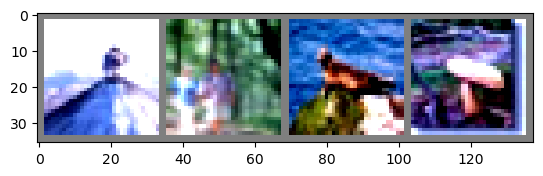

GroundTruth:  mountain forest seal  mushroom


In [9]:
dataiter = iter(testloader) # 获取测试数据集的迭代器
inputs, labels = next(dataiter) # 获取测试数据集的第一个 batch

imshow(torchvision.utils.make_grid(inputs))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


第一个 batch 的预测结果


In [10]:
outputs = model(inputs)
print(outputs)

_, predicted = torch.max(outputs, 1) # 获取最大值的索引

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


tensor([[-51.7199, -48.0513, -54.8906,  ..., -50.6357, -48.9509, -41.1081],
        [-37.0125, -32.8542, -41.2634,  ..., -42.2772, -37.3055, -43.0275],
        [-43.1007, -39.3542, -42.9733,  ..., -39.5827, -41.3898, -39.9700],
        [-10.9583,  -5.4510,  -7.3679,  ..., -28.1055, -28.4475, -26.2916]],
       grad_fn=<AddmmBackward0>)
Predicted:  can   forest beetle mushroom


总准确率


In [11]:
correct = 0
total = 0
# 因为我们不需要进行梯度计算，所以我们使用 torch.no_grad() 来减少内存开销
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1) # 取得分最高的那个类 (outputs.data 的索引号)
        total += labels.size(0) # 统计测试数据集的数量
        correct += (predicted == labels).sum().item() # 统计预测正确的数量

print(f'10000 测试集的准确率: {100 * correct // total} %')


10000 测试集的准确率: 11 %


每个类别的准确率

In [12]:
# 统计每个类别的预测情况
# 形式为字典：{类别名称: 数量}
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)
		# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的对象
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')


Accuracy for class: apple is 9.0 %
Accuracy for class: aquarium_fish is 21.0 %
Accuracy for class: baby  is 8.0 %
Accuracy for class: bear  is 0.0 %
Accuracy for class: beaver is 2.0 %
Accuracy for class: bed   is 10.0 %
Accuracy for class: bee   is 12.0 %
Accuracy for class: beetle is 20.0 %
Accuracy for class: bicycle is 1.0 %
Accuracy for class: bottle is 10.0 %
Accuracy for class: bowl  is 11.0 %
Accuracy for class: boy   is 0.0 %
Accuracy for class: bridge is 4.0 %
Accuracy for class: bus   is 21.0 %
Accuracy for class: butterfly is 12.0 %
Accuracy for class: camel is 8.0 %
Accuracy for class: can   is 41.0 %
Accuracy for class: castle is 6.0 %
Accuracy for class: caterpillar is 22.0 %
Accuracy for class: cattle is 10.0 %
Accuracy for class: chair is 13.0 %
Accuracy for class: chimpanzee is 6.0 %
Accuracy for class: clock is 0.0 %
Accuracy for class: cloud is 32.0 %
Accuracy for class: cockroach is 4.0 %
Accuracy for class: couch is 35.0 %
Accuracy for class: cra   is 9.0 %
Accura